In [177]:
!pip install giotto-tda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gtda.images  
import gtda.homology
import gtda.diagrams
import json 
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
import pandas as pd
from skimage.morphology import convex_hull_image

In [178]:
#coeff = [0,1,0]
def get_gs(img, show = False):
  gs = 0.2125*img[:,:,0] + 0.7154*img[:,:,1] + 0.0721*img[:,:,2]
  #gs = rgb2gray(img)
  if show:
    plt.imshow(gs, cmap = 'gray')
    plt.colorbar
  return gs

In [179]:
images= []
conj_images = []
images_h = []
conj_images_h = []
for i in range(1,10):
  img = get_gs(plt.imread("0"+ str(i) + "_dr.JPG"))
  images.append(img)
  conj_images.append(255 - img)
  img = get_gs(plt.imread("0"+ str(i) + "_h.jpg"))
  images_h.append(img)
  conj_images_h.append(255 - img)
for i in range(10,16):
  img = get_gs(plt.imread(str(i) + "_dr.JPG"))
  images.append(img)
  conj_images.append(255 - img)
  img = get_gs(plt.imread(str(i) + "_h.jpg"))
  images_h.append(img)
  conj_images_h.append(255 - img)

In [180]:
#Image Segmentation: Step 1
def avg_intensity(img):
  sh = np.shape(img)
  r = img[:,:,0]
  g = img[:,:,1]
  b = img[:,:,2]
  ret = np.zeros(np.shape(r))
  for i in range(0,np.shape(r)[0]):
      for j in range(np.shape(r)[1]):
        ret[i,j] = int((int(r[i,j])+int(g[i,j])+int(b[i,j]))/3.0)
  return ret

In [181]:
def get_alpha(ret):
  ret_1 = np.ravel(ret)
  ret_2 = ret_1[ret_1 > 0] 
  return int(ret_2.mean())

In [182]:
def get_alpha_2(ret, w):
  ret_1 = np.ravel(ret)
  ret_2 = ret_1[ret_1 > 0] 
  return np.quantile(ret_2,w)

In [183]:
def get_alpha_3(ret):
  ret_1 = np.ravel(ret)
  ret_2 = ret_1[ret_1 > 0]
  avg = ret_2.mean()
  max = ret_2.max()
  return int((avg*2+max)/3)

In [184]:
def img_thresh(img, t):
  ret = avg_intensity(img)
  val = t
  sh = np.shape(ret)
  r = np.zeros(sh)
  for i in range(0, sh[0]):
    for j in range(0, sh[1]):
      r[i,j] = 255*(ret[i,j] <= val)
  return r

In [185]:
#plt.matshow(avg_intensity(images_h[0]));
#plt.colorbar()
#a = get_alpha(avg_intensity(0))

In [186]:
def grayscale_data_fn(images = images, ent=True, land=False, 
                      heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    grayscale_data = np.zeros((np.shape(images)[0],n_col))
    cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(images)
    m=0
    if ent == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        grayscale_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2  
    print("done")          
    return grayscale_data

In [ ]:
a = get_alpha_3(images_h[0])
b = get_alpha_3(avg_intensity(images[0]))
a1 = int(a)
b1 = int(b)
img_1 = img_thresh(images_h[0], t = a1)
img_2 = img_thresh(images[0], t = b1)
img_1_1 = convex_hull_image((255-img_1)/255.0)
img_2_1 = convex_hull_image((255-img_2)/255.0)
plt.matshow(img_1)
plt.matshow(img_2)

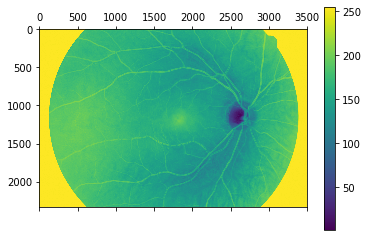

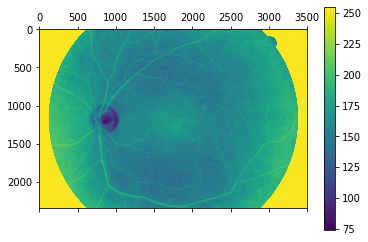

In [189]:
plt.matshow(255 - images_h[0]);
plt.colorbar()
plt.matshow(255 - images[0]);
plt.colorbar()

In [17]:
grayscale_d = grayscale_data_fn(images, wdist = True)
pd.DataFrame(grayscale_d).to_csv("grayscale_d.csv")
grayscale_conj = grayscale_data_fn(conj_images, wdist = True)
pd.DataFrame(grayscale_conj).to_csv("grayscale_conj.csv")
grayscale_h = grayscale_data_fn(images_h, wdist = True)
pd.DataFrame(grayscale_h).to_csv("grayscale_h.csv")
grayscale_conj_h = grayscale_data_fn(conj_images_h, wdist = True)
pd.DataFrame(grayscale_conj_h).to_csv("grayscale_d.csv")

done
done
done
done


In [18]:
!zip fundus.zip *.csv

  adding: grayscale_conj.csv (deflated 49%)
  adding: grayscale_d.csv (deflated 50%)
  adding: grayscale_h.csv (deflated 50%)


In [19]:
!mv fundus.zip "/content/drive/My Drive"

In [20]:
data_g = np.concatenate((grayscale_d,grayscale_h))
data_c = np.concatenate((grayscale_conj, grayscale_conj_h))
data = np.concatenate((data_g,data_c), axis = 1)
y = np.array([(x>=15) for x in range(0,30)])*1

In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
import sklearn.preprocessing

In [169]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 1/3, random_state = 31)

In [170]:
svm_model_linear = SVC(kernel = 'linear', class_weight = 'balanced').fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test)

In [171]:
accuracy = svm_model_linear.score(X_test, y_test)
cm = confusion_matrix(y_test, svm_predictions) 

In [172]:
print(accuracy)

0.9


In [173]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 314)

In [174]:
clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, test_pred) 

In [175]:
from sklearn.model_selection import LeavePOut

test_value = []
pred_value = []

lpo = LeavePOut(p=1)
for train, test in lpo.split(data):
  y_train = y[train]
  y_test = y[test]
  X_train = data[train]
  X_test = data[test]
  svm_model_linear = SVC(kernel = 'linear', class_weight = 'balanced').fit(X_train, y_train) 
  svm_predictions = svm_model_linear.predict(X_test) 
  test_value = test_value + list(y_test)
  pred_value = pred_value + list(svm_predictions)

In [176]:
cm = confusion_matrix(test_value, pred_value)
print(cm)

[[12  3]
 [ 1 14]]


0.8666666666666667